## Part III: Linear Regression

In [100]:
# Importing the Library
import numpy as np
import pandas as pd
import random
import pickle 
import seaborn as sns

import matplotlib.pyplot as plt

In [117]:
def ridge_regression(X, y, lambda_reg):
    
    print(X.shape)
    X_transpose = np.transpose(X)
    X_trans_X = np.dot(X_transpose, X)
    X_trans_X_reg = X_trans_X + lambda_reg*np.eye(X_trans_X.shape[0])
    XtX_reg_inv = np.linalg.inv(X_trans_X_reg)
    XtY = np.dot(X_transpose, y)
    w = np.dot(XtX_reg_inv, XtY)
    
    y_pred = np.dot(X, w)
    error = y - y_pred
    MSE = np.mean(error**2) + lambda_reg * np.dot(w.T, w)
    
    return w, MSE

In [102]:
# Read the dataset
flight_data = pd.read_csv('flight_price_prediction.csv')
flight_data.drop('Unnamed: 0', axis=1, inplace=True)
flight_data = flight_data.drop(['flight'], axis=1)

flight_data.dropna(inplace=True)
# print(flight_data)
print(flight_data.describe())


            duration      days_left          price
count  300153.000000  300153.000000  300153.000000
mean       12.221021      26.004751   20889.660523
std         7.191997      13.561004   22697.767366
min         0.830000       1.000000    1105.000000
25%         6.830000      15.000000    4783.000000
50%        11.250000      26.000000    7425.000000
75%        16.170000      38.000000   42521.000000
max        49.830000      49.000000  123071.000000


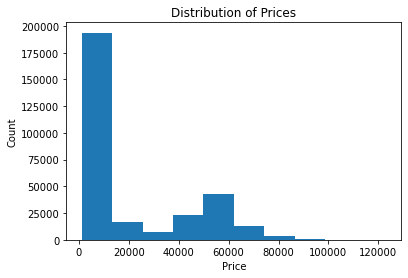

In [103]:
import matplotlib.pyplot as plt

plt.hist(flight_data['price'])
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of Prices')
plt.show()


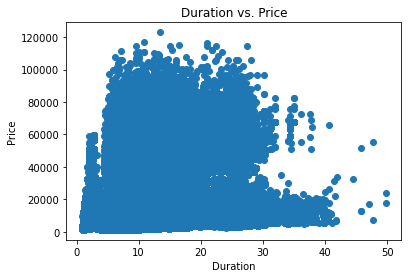

In [104]:
plt.scatter(flight_data['duration'], flight_data['price'])
plt.xlabel('Duration')
plt.ylabel('Price')
plt.title('Duration vs. Price')
plt.show()


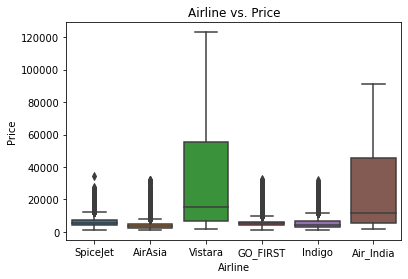

In [105]:
sns.boxplot(x='airline', y='price', data=flight_data)
plt.xlabel('Airline')
plt.ylabel('Price')
plt.title('Airline vs. Price')
plt.show()


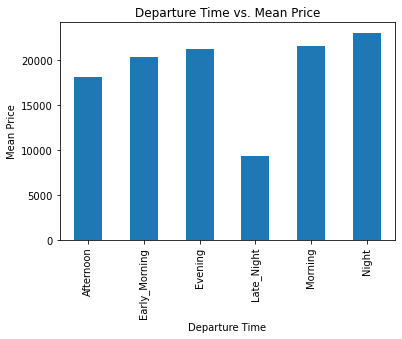

In [106]:
flight_data.groupby('departure_time')['price'].mean().plot(kind='bar')
plt.xlabel('Departure Time')
plt.ylabel('Mean Price')
plt.title('Departure Time vs. Mean Price')
plt.show()


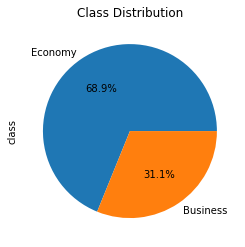

In [107]:
flight_data['class'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Class Distribution')
plt.show()


In [108]:

flight_data['departure_time'] = pd.Categorical(flight_data['departure_time'], categories=['Early_Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late_Night']).codes
flight_data['arrival_time'] = pd.Categorical(flight_data['arrival_time'], categories=['Early_Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late_Night']).codes

flight_data['stops'] = pd.Categorical(flight_data['stops'], categories=['zero', 'one', 'two_or_more']).codes
flight_data['class'] = pd.Categorical(flight_data['class'], categories=['Economy', 'Business']).codes
# flight_data['days_left'] = flight_data['days_left'].astype('category')

flight_data['airline'] = pd.Categorical(flight_data['airline']).codes
flight_data['source_city'] = pd.Categorical(flight_data['source_city']).codes
flight_data['destination_city'] = pd.Categorical(flight_data['destination_city']).codes

min_duration = flight_data["duration"].min()
max_duration = flight_data["duration"].max()

min_price = flight_data["price"].min()
max_price = flight_data["price"].max()

min_days_left = flight_data["days_left"].min()
max_days_left = flight_data["days_left"].max()

flight_data["duration"] = (flight_data["duration"] - min_duration) / (max_duration - min_duration)
flight_data["price"] = (flight_data["price"] - min_price) / (max_price - min_price)
flight_data["days_left"] = (flight_data["days_left"] - min_days_left) / (max_days_left - min_days_left)

print(flight_data)



        airline  source_city  departure_time  stops  arrival_time  \
0             4            2               3      0             4   
1             4            2               0      0             1   
2             0            2               0      0             0   
3             5            2               1      0             2   
4             5            2               1      0             1   
...         ...          ...             ...    ...           ...   
300148        5            1               1      1             3   
300149        5            1               2      1             4   
300150        5            1               0      1             4   
300151        5            1               0      1             3   
300152        5            1               1      1             3   

        destination_city  class  duration  days_left     price  
0                      5      0  0.027347        0.0  0.039749  
1                      5      0  0.030612

In [109]:
X = flight_data.drop(['price'], axis=1)
y = flight_data['price']

In [110]:
num_train_samples = int(0.8 * X.shape[0])
print(num_train_samples)
X_train = X.iloc[:num_train_samples].values
y_train = y.iloc[:num_train_samples].values
X_test = X.iloc[num_train_samples:].values
y_test = y.iloc[num_train_samples:].values
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_test:', y_test.shape)

240122
Shape of X_train: (240122, 9)
Shape of y_train: (240122,)
Shape of X_test: (60031, 9)
Shape of y_test: (60031,)


In [118]:
lambda_reg = 5.1
w, mse = ridge_regression(X_train, y_train, lambda_reg)

print('Weights:', w)
print('Mean Squared Error:', mse)


(240122, 9)
Weights: [ 6.50185568e-03  1.76322353e-03 -9.20491666e-05  3.55423386e-02
  2.02718599e-03  4.92200717e-04  3.53756141e-01  3.93881049e-02
 -5.19117146e-02]
Mean Squared Error: 0.6685188964871129


In [112]:
y_pred_ridge = np.dot(X_test, w)
print(len(y_pred_ridge))

60031


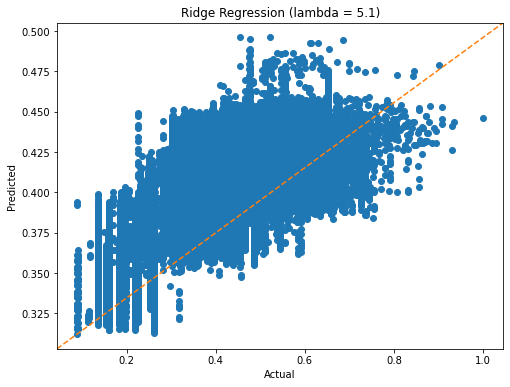

In [113]:
plt.figure(figsize=(8, 6))
plt.plot(y_test, y_pred_ridge, 'o')
plt.plot([0, 1], [0, 1], '--', transform=plt.gca().transAxes)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Ridge Regression (lambda = {})'.format(lambda_reg))
plt.show()

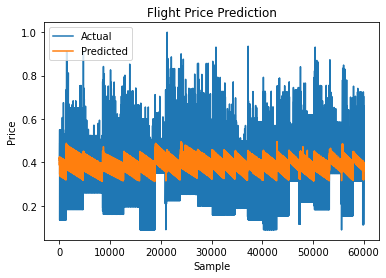

In [114]:
plt.plot(y_test, label='Actual')
plt.plot(y_pred_ridge, label='Predicted')
plt.legend()
plt.xlabel('Sample')
plt.ylabel('Price')
plt.title('Flight Price Prediction')
plt.show()

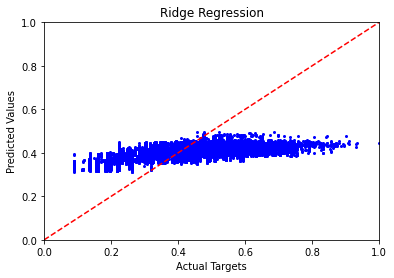

In [115]:
plt.plot(y_test, y_pred_ridge, 'bo', markersize=2)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('Actual Targets')
plt.ylabel('Predicted Values')
plt.title('Ridge Regression')
plt.show()


In [121]:
results = {
    "Weights": w,
    "MSE": mse,
}
with open("lokeshsu_assignment1_part3.pickle", "wb") as f:
    pickle.dump(results, f)
    